In [1]:
data = [i.strip('\n').split('\t') for i in open('/Users/Diego/Documents/School/ISTA539/final-project-dalcantara7/openclass_prize.train', 'r', encoding='utf8', errors='ignore')]
print(data[0])
print(" ")
print(data[1])

['What is the Turing Test?', 'The original Turing test involved three entities communicating with each other through computer terminals in separate rooms - a computer program trying to pass itself off as a human, a human trying to prove that she or he is human, and a human judge deciding which of the competitors is human and which a machine. This is different from the popular idea that it\'s about a human judging whether one subject is human or machine. The reason it\'s different is that Turing\'s original proposal was not intended as a practical test, but rather as a thought experiment making a philosophical argument - that it is impossible to determine whether something is "intelligent" better than by judging its linguistic interactions, and that therefore a machine that sounds intelligent has to be considered truly intelligent. And by "intelligent," Turing meant, like a human, with consciousness.', 'Which of the following is NOT an objection to the Turing Test mentioned in the readi

In [2]:
X = []
Y = []
for i in range(len(data)):
    if i % 2 == 0:
        X.append(' '.join(data[i]))
    else:
        Y.append(data[i])

print(X[0:3])
print(" ")
print(Y[0:5])

['What is the Turing Test? The original Turing test involved three entities communicating with each other through computer terminals in separate rooms - a computer program trying to pass itself off as a human, a human trying to prove that she or he is human, and a human judge deciding which of the competitors is human and which a machine. This is different from the popular idea that it\'s about a human judging whether one subject is human or machine. The reason it\'s different is that Turing\'s original proposal was not intended as a practical test, but rather as a thought experiment making a philosophical argument - that it is impossible to determine whether something is "intelligent" better than by judging its linguistic interactions, and that therefore a machine that sounds intelligent has to be considered truly intelligent. And by "intelligent," Turing meant, like a human, with consciousness. Which of the following is NOT an objection to the Turing Test mentioned in the reading? In

In [9]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
class_labels = mlb.fit_transform(Y)

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X_trans = vectorizer.fit_transform(X)

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_trans, class_labels, test_size=0.2)
print("Length of X_train: ", X_train.shape)
print("Length of Y_train: ", Y_train.shape)

Length of X_train:  (130, 23952)
Length of Y_train:  (130, 325)


In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier
from sklearn.multiclass import OneVsRestClassifier

clf = OneVsRestClassifier(LogisticRegression(solver='saga', class_weight={0 : 1, 1 : 10}, max_iter=50)).fit(X_train, Y_train)

/usr/local/Cellar/python/3.7.5/Frameworks/Python.framework/Versions/3.7/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 3 is present in all training examples.
  str(classes[c]))
/usr/local/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 4 is present in all training examples.
  str(classes[c]))
/usr/local/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 5 is present in all training examples.
  str(classes[c]))
/usr/local/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label 

In [40]:
predictions_prob = clf.predict_proba(X_test)

In [41]:
predictions_prob[0]

array([6.40011963e-02, 1.99885185e-02, 2.26746106e-02, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.24603259e-03, 9.25513229e-02,
       7.71439923e-02, 7.78843222e-05, 3.94745382e-02, 1.54872343e-01,
       0.00000000e+00, 1.40546744e-03, 8.35521730e-04, 9.63897675e-01,
       3.07988604e-04, 8.66112283e-02, 8.50021949e-02, 1.57170708e-01,
       1.75591845e-01, 0.00000000e+00, 5.40955160e-04, 7.01023865e-02,
       2.13654679e-02, 5.21193488e-02, 3.30595335e-02, 1.14224315e-01,
       5.31910421e-02, 9.02270880e-05, 4.91814948e-01, 1.41627660e-01,
       0.00000000e+00, 5.18522186e-01, 2.48166770e-02, 1.55853026e-03,
       1.17621365e-04, 1.46565434e-03, 9.78879583e-05, 4.78281552e-02,
       2.60670244e-03, 2.77890300e-02, 1.81030622e-01, 1.36178332e-01,
       4.06304966e-03, 2.41504576e-01, 1.31413425e-02, 0.00000000e+00,
       0.00000000e+00, 1.08153948e-01, 8.67584106e-02, 1.05617124e-01,
       5.63205677e-02, 0.00000000e+00, 2.91194906e-03, 0.00000000e+00,
      

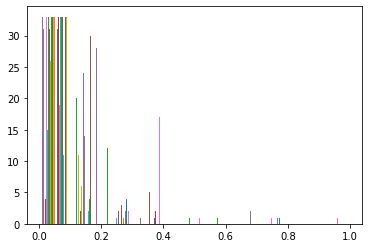

In [42]:
from matplotlib import pyplot as plt

bins = np.arange(0, 1, 200)
plt.hist(predictions_prob)
plt.show()

In [62]:
predictions = np.where(predictions_prob > 0.5, 1, 0)
predictions[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [64]:
from sklearn.metrics import precision_recall_fscore_support
sum_ = 0
precision, recall, _, __ = precision_recall_fscore_support(Y_test, predictions, average='macro')
f2_score = (5 *  precision * recall) / (4 * (precision+recall))
sum_ += f2_score
print(f2_score)
precision, recall, _, __ = precision_recall_fscore_support(Y_test, predictions, average='micro')
f2_score = (5 *  precision * recall) / (4 * (precision+recall))
sum_ += f2_score
print(f2_score)
precision, recall, _, __ = precision_recall_fscore_support(Y_test, predictions, average='weighted')
f2_score = (5 *  precision * recall) / (4 * (precision+recall))
sum_ += f2_score
print(f2_score)
print(sum_ / 3)

0.027878839992989148
0.10441527446300716
0.12653122343303191
0.08627511262967608
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
